<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW10/Task2/kerasmnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

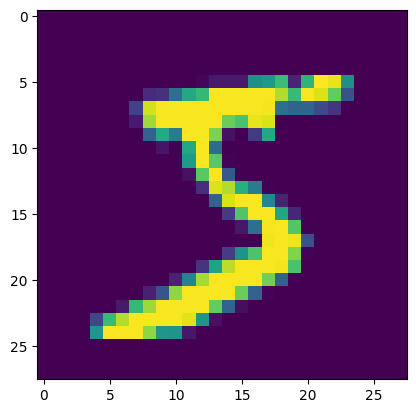

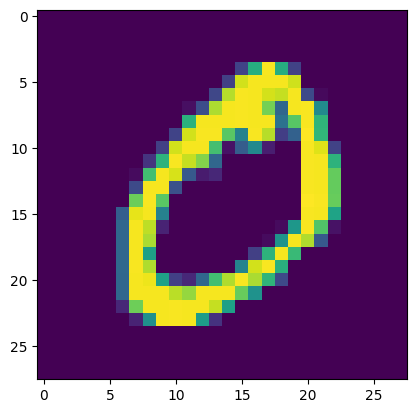

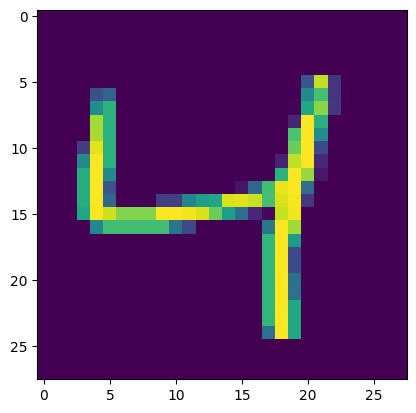

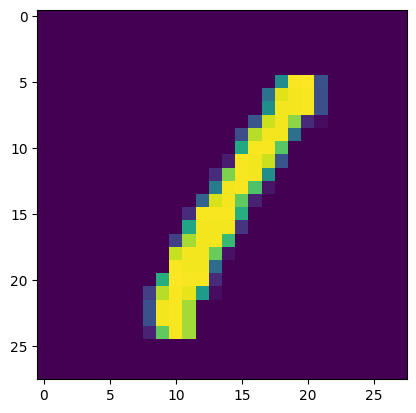

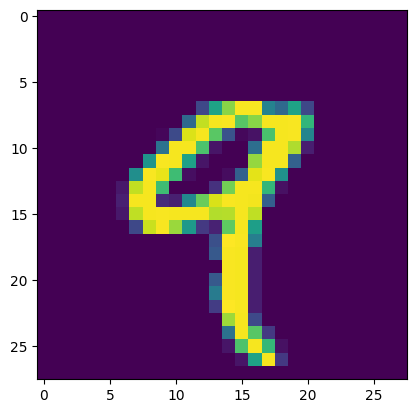

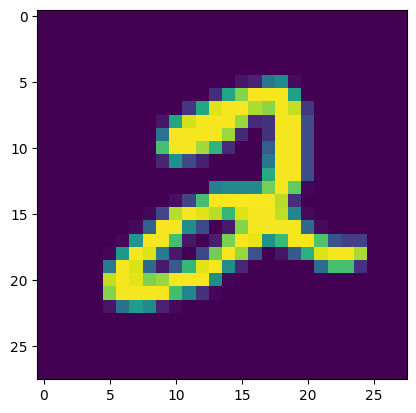

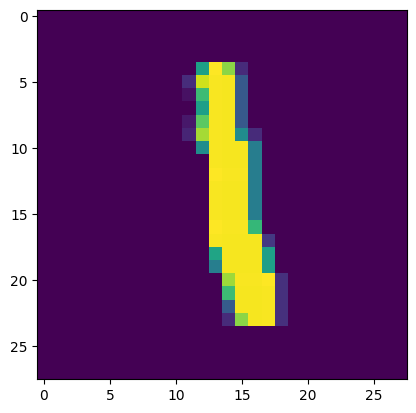

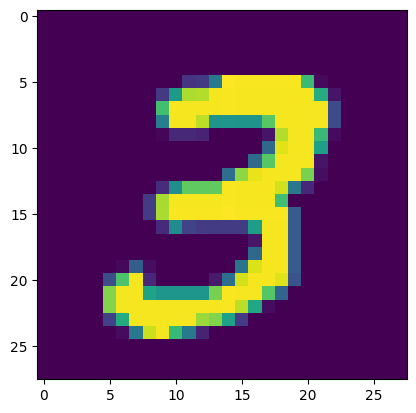

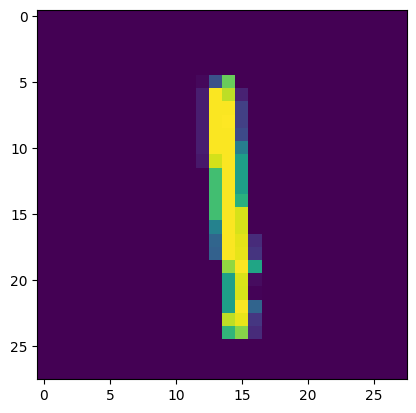

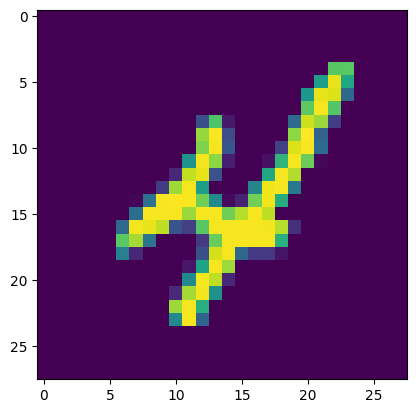

In [8]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

These plots show the first ten images from the MNIST training dataset, displayed in their original index order using x_train[i]. Each image is a 28×28 grayscale handwritten digit, representing the raw pixel inputs the neural network sees before any training or preprocessing. The images are not randomly selected—this loop simply visualizes the first samples exactly as they appear in the dataset. What is shown here are the actual training digits; how they are produced is through sequential indexing rather than random sampling; and why they matter is because they illustrate the type of data the model must learn to interpret and classify, providing an intuitive understanding of the starting point for the network’s learning process.

The above code, ONLY displays the images.

It does not train the model and does not contribute to the loss plot.

But the code after this loop builds the neural network, trains it, stores the training history, and finally plots the loss curves.

The code after the image-display loop is essential because it prepares the data, builds the neural network, trains it, and collects the training and validation loss values into the history object. The final plot of history.history['loss'] and history.history['val_loss'] depends entirely on the model being trained in these later cells. Without the reshaping, model definition, compilation, and training steps, the final loss plot could not be produced, because no loss or validation values would exist to visualize.

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
#Converting labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Flattening the images (for the MLP model):

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
x_testraveled.shape

(10000, 784)

In [15]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [16]:
#Building the MLP model
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

"""
Compilation sets:

loss function

optimizer

metrics

This tells Keras how to train the network.
"""

In [18]:

#Training the model (this produces history)
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5615 - loss: 1.7716 - val_accuracy: 0.8962 - val_loss: 0.6149
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9040 - loss: 0.5117 - val_accuracy: 0.9287 - val_loss: 0.3121
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9363 - loss: 0.2800 - val_accuracy: 0.9463 - val_loss: 0.2212
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9502 - loss: 0.2007 - val_accuracy: 0.9521 - val_loss: 0.1873
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.1529 - val_accuracy: 0.9586 - val_loss: 0.1544
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1212 - val_accuracy: 0.9636 - val_loss: 0.1365
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0968 - val_accuracy: 0.9644 - val_loss: 0.1280
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0810 - val_accuracy: 0.

In [19]:
#Plotting the loss
history.history

{'accuracy': [0.7455333471298218,
  0.9121778011322021,
  0.9384444355964661,
  0.9531111121177673,
  0.9630222320556641,
  0.9702000021934509,
  0.9750000238418579,
  0.980222225189209,
  0.9831110835075378,
  0.9864888787269592],
 'loss': [1.3031889200210571,
  0.43186402320861816,
  0.2606481909751892,
  0.18856947124004364,
  0.14756131172180176,
  0.1175868809223175,
  0.09647993743419647,
  0.07934720814228058,
  0.06671634316444397,
  0.054273173213005066],
 'val_accuracy': [0.8962000012397766,
  0.9287333488464355,
  0.9463333487510681,
  0.9521333575248718,
  0.9585999846458435,
  0.9635999798774719,
  0.9643999934196472,
  0.967199981212616,
  0.9695333242416382,
  0.9682000279426575],
 'val_loss': [0.6149041652679443,
  0.3121010661125183,
  0.22119364142417908,
  0.18731775879859924,
  0.1544451117515564,
  0.13651525974273682,
  0.12795612215995789,
  0.11809741705656052,
  0.11057150363922119,
  0.10956830531358719]}

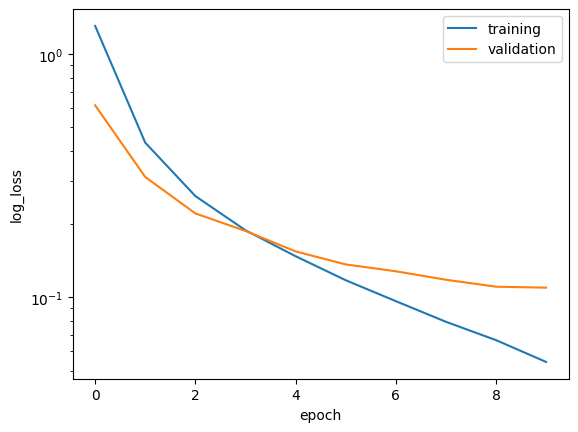

In [20]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')

Caption:

Training and validation log-loss curves for the fully connected neural network (MLP). The plot shows that both losses steadily decrease over epochs, indicating that the model is successfully learning the classification task. The training loss drops more quickly at the beginning and continues to improve smoothly, while the validation loss follows a similar trend with only a small and widening gap, revealing mild overfitting. The “wow” aspect is how a simple multilayer perceptron—despite having no knowledge of image structure—can still learn meaningful patterns from flattened pixels and achieve steadily improving performance.

In [21]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9680 - loss: 0.1111


[0.09900246560573578, 0.972000002861023]

For my understanding: Training loss and validation loss are not different loss functions; rather, they are the values produced by applying the same loss function to different datasets. The loss function—such as categorical cross-entropy or mean squared error—remains fixed throughout training and measures how well the model’s predictions match the true labels. When this loss function is evaluated on the data the model learns from, we call the result training loss; when evaluated on separate, unseen validation data, the result is called validation loss. Plotting these two values helps us monitor both learning progress and generalization: training loss shows how well the model fits the data it has seen, while validation loss indicates how well it performs on new data and reveals signs of overfitting if the two curves diverge.



*   “training loss” = loss value on training set

*   “validation loss” = loss value on validation set




##Convolutional method

| Feature                       | Neural Network (NN / MLP)  | Convolutional Neural Network (CNN) |
| ----------------------------- | -------------------------- | ---------------------------------- |
| Inputs                        | Flat vector                | 2D or 3D structured grid           |
| Connections                   | Fully connected            | Local connections (kernels)        |
| Parameter count               | Huge                       | Much smaller                       |
| Spatial awareness             | None                       | Yes                                |
| Best for                      | Tabular data, simple tasks | Images, videos, spatial data       |
| Translation invariance        | No                         | Yes                                |
| Hierarchical feature learning | Weak                       | Strong                             |


In [22]:
# Reshape the flattened data back to 28x28x1 for the CNN
x_train_cnn = x_trainraveled.reshape(-1, 28, 28, 1)
x_test_cnn = x_testraveled.reshape(-1, 28, 28, 1)

x_train_cnn.shape, x_test_cnn.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
history_cnn = cnn.fit(
    x_train_cnn,
    y_train,
    batch_size=120,
    epochs=10,
    validation_split=0.25,
    verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8322 - loss: 0.5913 - val_accuracy: 0.9754 - val_loss: 0.0829
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9777 - loss: 0.0726 - val_accuracy: 0.9788 - val_loss: 0.0717
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9843 - loss: 0.0513 - val_accuracy: 0.9821 - val_loss: 0.0584
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0394 - val_accuracy: 0.9825 - val_loss: 0.0597
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9829 - val_loss: 0.0564
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9831 - val_loss: 0.0565
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9865 - val_loss: 0.0483
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0153 - val_accuracy: 0.

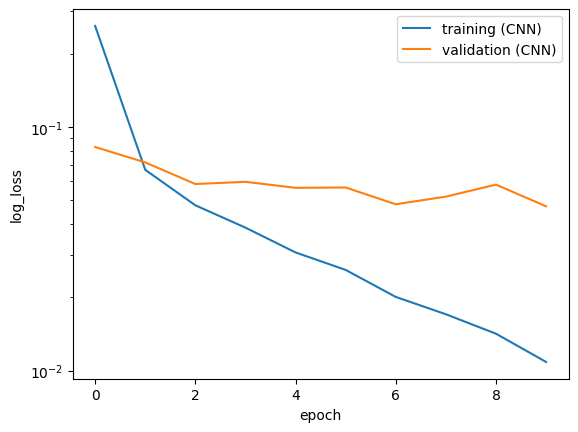

In [26]:
plt.plot(history_cnn.history['loss'], label="training (CNN)")
plt.plot(history_cnn.history['val_loss'], label="validation (CNN)")
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')
plt.show()



Caption:

Log-loss curves for the Convolutional Neural Network (CNN) during training. The plot shows a rapid and substantial decrease in training loss within the first two epochs, demonstrating how quickly the CNN learns fundamental visual features such as edges and strokes in MNIST digits. After this sharp initial improvement, the training curve continues to decline smoothly as the network refines its internal representations. The validation loss remains low and stable across epochs, with only mild fluctuations, indicating strong generalization and minimal overfitting. The key “wow” feature of this plot is the CNN’s ability to achieve an order-of-magnitude reduction in loss early on and maintain highly consistent performance on unseen validation data—highlighting the remarkable effectiveness of convolutional layers at capturing spatial structure in image data.

In [27]:
cnn.evaluate(x_test_cnn, y_test, verbose=1)
#evaluates the trained CNN on the test dataset and reports how well the model performs on data it has never seen before.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9875 - loss: 0.0413


[0.03437142074108124, 0.9896000027656555]

**Conclusion:**

The performance comparison between the two neural network models clearly shows the advantage of using a convolutional architecture for image classification. The fully connected MLP achieved a test accuracy of 96.80% with a loss of 0.1111, demonstrating that it can learn the MNIST digit patterns reasonably well even when trained on flattened pixel inputs. However, the CNN performed substantially better, reaching a higher test accuracy of 98.75% and a much lower loss of 0.0413. These numbers confirm that the CNN not only makes more correct predictions but also produces more confident and stable outputs. The CNN’s significantly lower loss—almost three times smaller than the MLP’s—highlights its superior ability to extract spatial features such as edges and stroke patterns, which the MLP cannot capture in flattened form. Overall, the numerical results clearly demonstrate that the CNN generalizes better and is far more effective for image-based tasks like MNIST.

CNNs act better on image data because they are specifically designed to take advantage of spatial structure. Instead of flattening an image into a long vector like an MLP does, CNNs use convolution filters that slide across the image and detect local patterns such as edges, corners, textures, and digit strokes. These learned filters build hierarchical features—early layers detect simple shapes, while deeper layers combine them into more complex patterns. This makes CNNs far more efficient and expressive for vision tasks. They also use weight sharing, meaning the same filter is applied across the whole image, greatly reducing the number of parameters and improving generalization. As a result, CNNs can learn the essential visual features of digits more effectively and with fewer parameters, leading to higher accuracy and lower loss compared to a fully connected network.